# Algotytm przecinania się odcinków na płaszczyźnie

In [1]:
import numpy as np
import pandas as pd
from bitalg.tests.test4 import Test
from bitalg.visualizer.main import Visualizer

# Przydatne funkcje 

In [2]:
def draw_example_1():
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))

    vis.add_line_segment(line_segments)
    vis.show()
    
def draw_example_2():
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))
    points = [(4, 2),
              (2.5, 3.5),
              (5.5, 4.5)]

    vis.add_line_segment(line_segments)
    vis.add_point(points, color='red')
    vis.show()


### Wprowadzenie
Celem ćwiczenia jest implementacja i zapoznanie się z algorytmem wyznaczającym wszystkie przecięcia się odcinków na płaszczyźnie

### Przykładowy zbiór odcinków przed wyznaczeniem punktów przecięcia

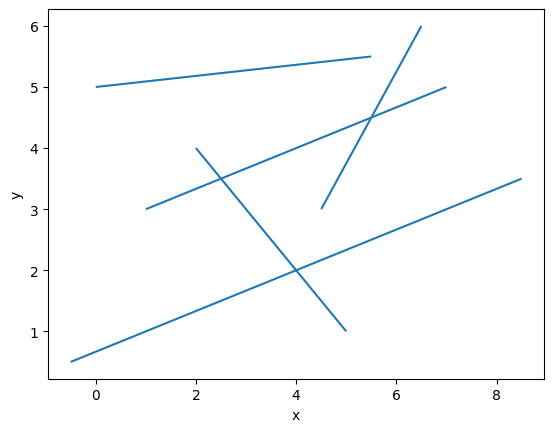

In [3]:
draw_example_1()

### Przykładowy zbiór odcinków po wyznaczenu punktów przecięcia

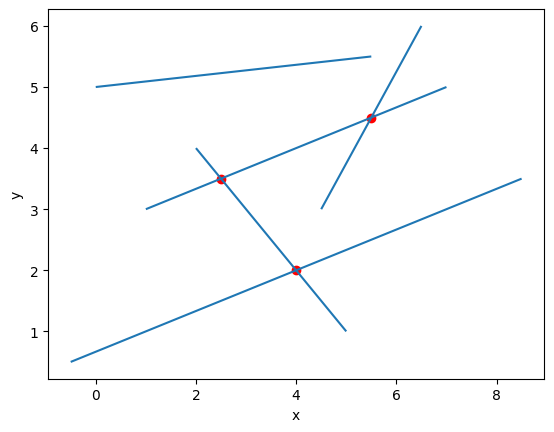

In [4]:
draw_example_2()

# Generowanie losowych odcinków na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_sections```

In [5]:
def generate_uniform_sections(max_x, max_y, n):
    """
    Funkcja generuje odcinki o współrzędnych rzeczywistych w postaci par punktów. 
    Żaden wygenerowany odcinek nie jest odcinkiem pionowym.
    Żadne dwa odcinki nie mają swoich końców o takiej samej współrzędnej x.
    Zakres współrzędnych: x -> (0, max_x), y -> (0, max_y)
    :param max_x: określa maksymalną wartość współrzednej x jaka może zostać wylosowana
    :param max_y: określa maksymalną wartość współrzednej y jaka może zostać wylosowana
    :param n: ilość generowanych odcinków
    :return: tablica odcinków w postaci krotek zawierających parę krotek współrzędnych punktów końcowych odcinków
    np. [((x1, y1), (x2, y2)), ((x3, y3), (x4, y4)),...]
    """
    segments = []
    used_x_coords = set()

    while len(segments) < n:

        x1, x2 = np.random.uniform(0, max_x, 2)
        y1, y2 = np.random.uniform(0, max_y, 2)

        if x1 != x2 and (x1, x2) not in used_x_coords and (x2, x1) not in used_x_coords:
            segments.append(((x1, y1), (x2, y2)))
            used_x_coords.add((x1, x2))

    return segments
    raise Exception("Unimplemented")

In [6]:
Test().runtest(1, generate_uniform_sections)

Lab 4, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.078s


<span style="color:red">Ćw.</span> Wygeneruj $\large20$ losowych odcinków w przestrzeni 2D o współrzędnych z przedziału $\large x \in \langle 0,1000 \rangle$ oraz $\large y \in \langle 0,1000\rangle$. 

In [7]:
segments = generate_uniform_sections(1000,1000,20)

Zwizualizuj otrzymane odcinki

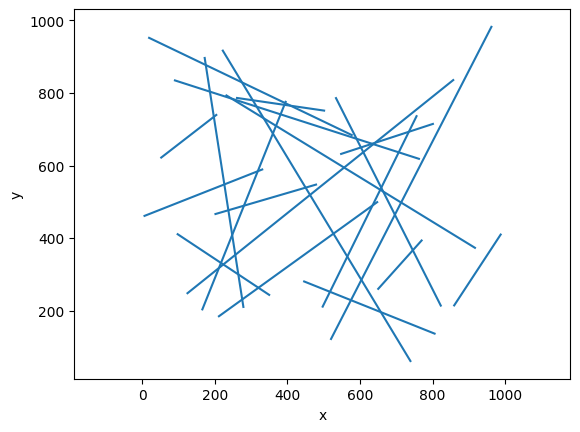

In [8]:
visualize =  Visualizer()

visualize.add_line_segment(segments)
visualize.axis_equal()
visualize.show()

Uzupełnij funkcję ```add_sections``` #interaktywne dodawanie odcinków przez rysowanie myszką

In [9]:
%matplotlib tk

import matplotlib.pyplot as plt
from matplotlib.widgets import Button
from tkinter import Tk
from tkinter.filedialog import askopenfilename
from datetime import datetime

segments = []  # Lista odcinków
temp_point = None  # Tymczasowy punkt do rysowania odcinka

def draw_points(ax, point):
    ax.scatter(point[0], point[1], color="red")
    plt.draw()

def draw_line(ax, point1, point2):
    """Rysuje linię między dwoma punktami."""
    line, = ax.plot([point1[0], point2[0]], [point1[1], point2[1]], color="red")
    plt.draw()

def reset_segments(event):
    global segments, temp_point
    segments = []
    temp_point = None
    ax.cla()
    ax.set_xlim([0, 1000])
    ax.set_ylim([0, 1000])
    ax.set_aspect('equal')
    ax.set_title("Kliknij, aby dodać punkty odcinków.\nZapisz/Wczytaj przyciski.")
    plt.draw()

def save_segments(event):
    if segments:
        timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
        filename = f"segments_{timestamp}.txt"
        with open(filename, "w") as file:
            for seg in segments:
                file.write(f"{seg[0][0]} {seg[0][1]} {seg[1][0]} {seg[1][1]}\n")
        plt.close()

def load_segments(event):
    global segments
    Tk().withdraw()
    file_path = askopenfilename(title="Wybierz plik z odcinkami", filetypes=[("All Files", "*.*")])
    if not file_path:
        return
    try:
        loaded_segments = [
            ((float(x1), float(y1)), (float(x2), float(y2)))
            for x1, y1, x2, y2 in (line.strip().split() for line in open(file_path, "r"))
        ]
    except Exception:
        return
    segments[:] = loaded_segments

    ax.cla()
    ax.set_xlim([0, 1000])
    ax.set_ylim([0, 1000])
    ax.set_aspect('equal')
    ax.set_title("Kliknij, aby dodać punkty odcinków.\nZapisz/Wczytaj przyciski.")
    
    for seg in segments:
        draw_line(ax, seg[0], seg[1])
    
    plt.draw()

def onclick(event):
    global temp_point, segments
    if not ax.contains(event)[0]:
        return

    if event.button == 1:  # Kliknięcie lewym przyciskiem
        if event.xdata is None or event.ydata is None:
            return
        x, y = event.xdata, event.ydata
        new_point = (x, y)

        if temp_point is None:
            temp_point = new_point
            draw_points(ax, new_point)
        else:
            segments.append((temp_point, new_point))
            draw_points(ax, new_point)
            draw_line(ax, temp_point, new_point)
            temp_point = None

fig, ax = plt.subplots()
plt.get_current_fig_manager().set_window_title("Wygeneruj odcinki!")
ax.set_title("Kliknij, aby dodać punkty odcinków.\nZapisz/Wczytaj przyciski.")
fig.canvas.mpl_connect("button_press_event", onclick)
ax.set_xlim([0, 1000])
ax.set_ylim([0, 1000])
ax.set_aspect('equal')

ax_save = plt.axes([0.7, 0.01, 0.1, 0.075])
ax_load = plt.axes([0.58, 0.01, 0.1, 0.075])
ax_reset = plt.axes([0.46, 0.01, 0.1, 0.075])

btn_save = Button(ax_save, "Zapisz")
btn_load = Button(ax_load, "Wczytaj")
btn_reset = Button(ax_reset, "Reset")

btn_save.on_clicked(save_segments)
btn_load.on_clicked(load_segments)
btn_reset.on_clicked(reset_segments)

plt.tight_layout()
plt.ion()
plt.show()


def add_sections(new_sections):
    """
    Dodaje nowe odcinki do globalnej listy odcinków i rysuje je na wykresie.
    Parameters:
    new_sections (list of tuples): Lista odcinków w formacie [((x1, y1), (x2, y2)), ...].
    """
    global segments
    for section in new_sections:
        if len(section) == 2 and all(len(point) == 2 for point in section):
            segments.append(section)
            draw_line(ax, section[0], section[1])
        else:
            print(f"Invalid section format: {section}")
    plt.draw()


C:\Users\Maciek\AppData\Local\Temp\ipykernel_35668\4171778152.py:107: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


[((126.95107661509348, 375.7050180546113), (873.0489233849063, 795.2142469160262)), ((161.1130659360556, 554.7138420964528), (848.4522910738136, 239.05706077076275)), ((601.1194883900479, 747.3874618666792), (644.8468347208794, 258.1877747905015)), ((702.2389767800956, 788.3818490518338), (756.8981596936352, 226.75874461521636)), ((579.2558152246321, 461.79323114343583), (661.2445895949412, 489.1228226002055)), ((725.4691295183501, 464.52619028911283), (747.3328026837656, 471.3585881533053))]


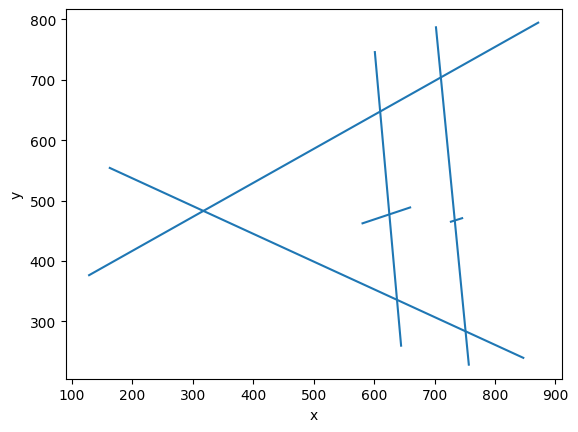

In [10]:
%matplotlib inline
print(segments)
visualize =  Visualizer()

visualize.add_line_segment(segments)
visualize.axis_equal()
visualize.show()

### Testowane zbiory


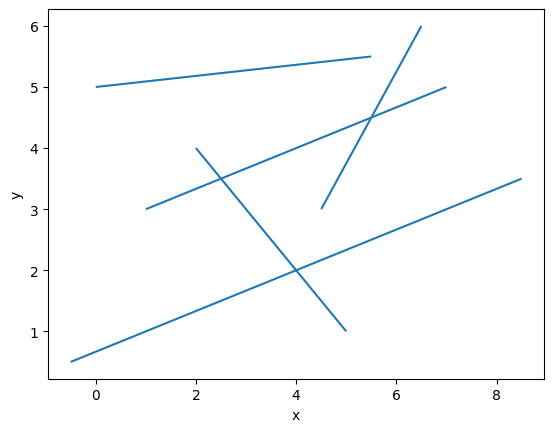

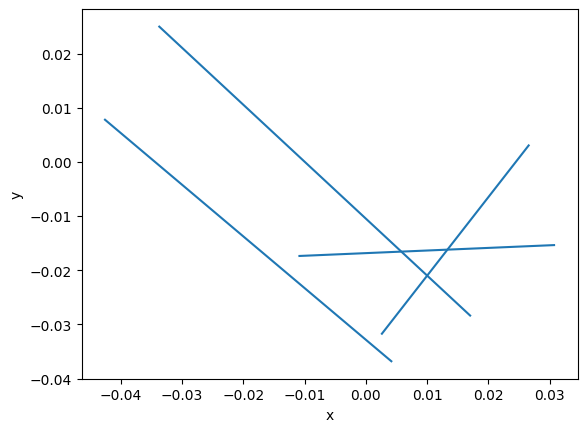

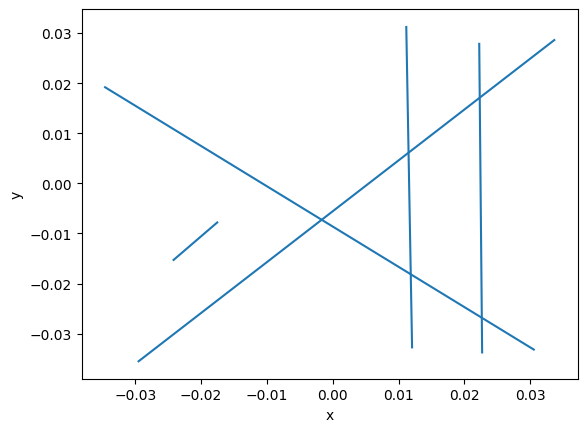

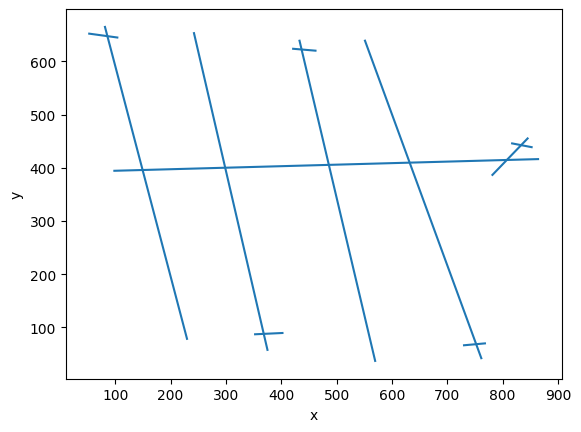

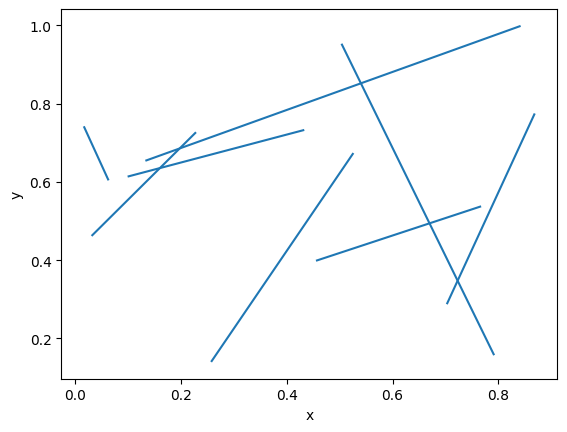

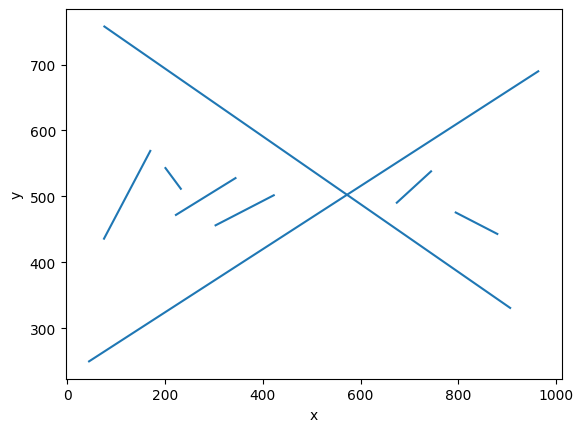

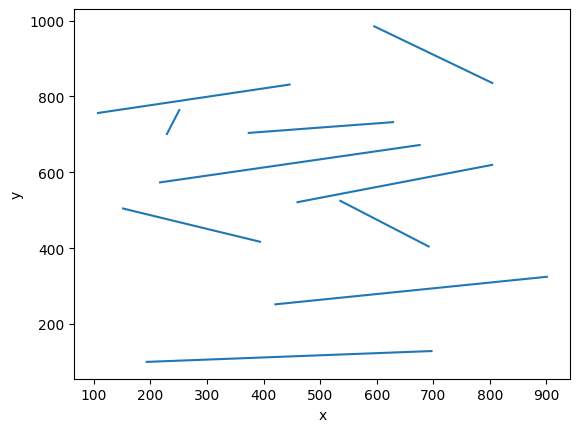

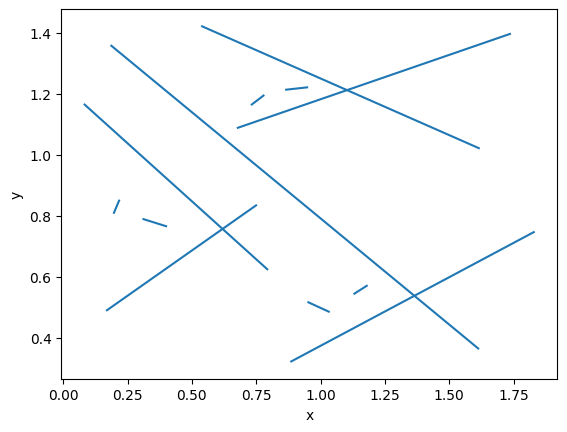

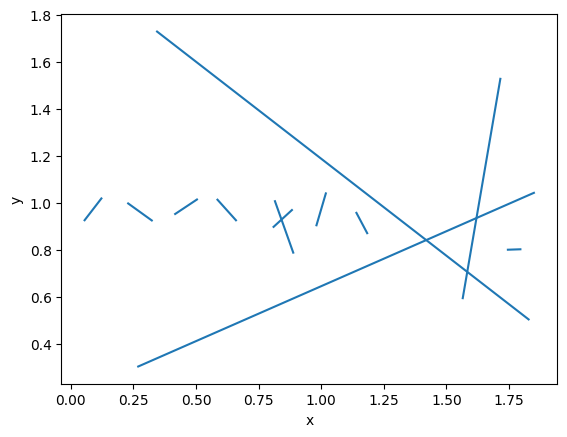

In [11]:
segments1=[((-0.04271371103102162, 0.007908498446146661), (0.004302418001236444, -0.03691380547542198)), ((-0.03384274328908614, 0.02509599844614667), (0.017165321227042896, -0.02848856037738276)), ((-0.011000001353602261, -0.017367236847970993), (0.030915321227042908, -0.015345178024441575)), ((0.002528224452849351, -0.03185865841659845), (0.02670161154962354, 0.0031903611912447033))]

segments2=[((-0.034729840063279685, 0.019299425704806472), (0.030693547033494514, -0.03327410370695825)), ((-0.02962903361166678, -0.03563317233440923), (0.03379838574317193, 0.028735700214610402)), ((0.01117741800123645, 0.031431778645982955), (0.012064514775429996, -0.032937093903036674)), ((0.02226612767865581, 0.028061680606767267), (0.022709676065752582, -0.03394812331480138)), ((-0.024306452966505486, -0.015412584099115098), (-0.017431452966505487, -0.007661358608919019))]

segments3=[((np.float64(0.86890709643147), np.float64(0.7745676765320609)), (np.float64(0.7026143234429308), np.float64(0.287548836624563))), ((np.float64(0.13248664400633337), np.float64(0.6537935013168965)), (np.float64(0.8421738133140599), np.float64(0.9981323864107179))), ((np.float64(0.7674921788371506), np.float64(0.5374833170097453)), (np.float64(0.45518195145196094), np.float64(0.39844916391038))), ((np.float64(0.06283204287142219), np.float64(0.6037635292056792)), (np.float64(0.016084590930744547), np.float64(0.7417848183534678))), ((np.float64(0.43302767846141654), np.float64(0.7324894827511444)), (np.float64(0.09892296722310023), np.float64(0.6133440220391748))), ((np.float64(0.03076110527992726), np.float64(0.4618501708422317)), (np.float64(0.22825322465722897), np.float64(0.7266499426060331))), ((np.float64(0.5259060210110673), np.float64(0.6734885192038645)), (np.float64(0.25682521556580906), np.float64(0.14012804382140964))), ((np.float64(0.5034526388458667), np.float64(0.9526433825400438)), (np.float64(0.7920829442782766), np.float64(0.15736782298699992)))]

segments0=[((80.99242599727972, 666.7679932937646), (230.17468918710267, 76.52512589055169)), ((241.84982282804538, 655.0928596528219), (375.46524116327817, 55.76933275109806)), ((432.54367229677575, 640.8232518694475), (570.0508018456559, 35.013539611644404)), ((550.5922457774183, 640.8232518694475), (762.0418883856022, 40.20248789650782)), ((96.55927085186988, 394.34820833843554), (865.8208540828704, 416.4012385491051)), ((780.2032073826241, 385.2675488399246), (846.3622980146325, 456.61558775679646)), ((np.float64(815.228608305452), np.float64(446.2376911870697)), (np.float64(854.1457204419277), np.float64(438.45426875977455))), ((np.float64(728.31372453399), np.float64(66.14722932082486)), (np.float64(769.8253108128973), np.float64(70.03894053447243))), ((np.float64(419.5713015846171), np.float64(623.9591699436414)), (np.float64(463.67736200595607), np.float64(620.0674587299939))), ((np.float64(350.81773681017705), np.float64(86.90302246027852)), (np.float64(404.00445673002685), np.float64(89.49749660271021))), ((np.float64(51.15597335931511), np.float64(652.4983855103902)), (np.float64(105.63993035038084), np.float64(644.7149630830951)))]

segments4=[((74.01707416226265, 758.6096753586153), (907.6891805563621, 330.0133573378244)), ((42.65636796561944, 248.99819966316272), (965.1838085835413, 690.6614785992216)), ((74.01707416226265, 434.54904465996856), (170.71258493524596, 570.4454381787559)), ((220.3670364132645, 471.136535222719), (345.8098611998374, 528.6311632498982)), ((301.3821940879261, 455.4561821243974), (424.21162669144553, 502.49724141936224)), ((199.45989894883564, 544.3115163482198), (233.43399732853243, 510.337417968523)), ((672.4838840815378, 489.4302805040942), (745.6588652070386, 539.0847319821127)), ((792.6999245020036, 476.36331958882613), (881.555258725826, 442.38922120912935))]

segments5=[((np.float64(105.37778035890591), np.float64(755.9962831755618)), (np.float64(447.7321563389279), np.float64(831.7846564841162))), ((np.float64(215.14025204715722), np.float64(573.0588303618094)), (np.float64(677.7106684476449), np.float64(672.3677333178464))), ((np.float64(371.9437830303734), np.float64(703.7284395144897)), (np.float64(630.6696091526801), np.float64(732.4757535280793))), ((np.float64(149.80544747081717), np.float64(505.11063360241576)), (np.float64(395.4643126778559), np.float64(416.25529937859335))), ((np.float64(228.20721296242527), np.float64(698.5016551483825)), (np.float64(251.72774260990764), np.float64(766.4498519077762))), ((np.float64(533.9740983796968), np.float64(526.0177710668446)), (np.float64(693.3910215459666), np.float64(403.1883384633253))), ((np.float64(191.61972239967486), np.float64(100.03484522910733)), (np.float64(698.6178059120739), np.float64(128.78215924269696))), ((np.float64(902.4623961902548), np.float64(324.7865729717172)), (np.float64(418.98484232533826), np.float64(251.6115918462163))), ((np.float64(458.1857250711423), np.float64(520.7909867007374)), (np.float64(805.7668854172716), np.float64(620.0998896567744))), ((np.float64(805.7668854172716), np.float64(834.3980486671699)), (np.float64(594.0821185899297), np.float64(985.9747952842788)))]

segments6 = [((0.07985264450486795,1.1667636109818518),(0.7958199155462553,0.6223243369008841)),((0.1664615885824552,0.48830851558864585),(0.7525154435074617,0.8359120521172637)),((0.19533123660831753,0.8065960912052116),(0.21842695502900744,0.8526640297812936)), ((0.3079228639091809,0.7898441135411819),(0.40319270239452676,0.7647161470451372)),((0.18378337739797257,1.3594113541181942),(1.6157179194807474,0.3626686831084225)),((0.8824288596238425,0.32078873894834803),(1.8322402796747153,0.7479641693811074)),((0.9488290500833261,0.517624476500698),(1.0354379941609133,0.4841205211726384)),((1.127820867843673,0.5427524429967426),(1.1826731990928114,0.5720684039087948)), ((0.5359930833134938,1.422231270358306),(1.6186048842833336,1.0201838064215913)),((0.6745673938376333,1.0871917170777103),(1.7398574059919556,1.3971033038622613)),((0.7294197250867718,1.1625756165658443),(0.7813850915333241,1.196079571893904)),((0.8622201060057388,1.2128315495579338),(0.9517160148859123,1.2212075383899486))]

segments7 = [((0.34112295913892254, 1.7317764495655925), (1.8315185384740686, 0.5006469899562511)), ((0.2653401330710339, 0.301004374884466), (1.8531707744934651, 1.0441185532072217)), ((0.052426478880298694, 0.9221147328855752), (0.1246005989449547, 1.0219360404214677)), ((0.22564436703547305, 0.9997535276357139), (0.3266881351259914, 0.9221147328855752)), ((0.4132970792035785, 0.9498428738677676), (0.5071234352876313, 1.0163904122250293)), ((0.58290626135552, 1.0163904122250293), (0.6622977934266416, 0.9221147328855752)), ((0.8066460335559535, 0.8943865919033829), (0.8860375656270751, 0.9720253866535216)), ((0.8138634455624192, 1.0108447840285908), (0.889646271630308, 0.7834740279746133)), ((0.979863921711128, 0.8999322200998212), (1.0195596877466888, 1.0441185532072217)), ((1.138646985853371, 0.9609341302606444), (1.1855601638953974, 0.8666584509211905)), ((1.7160399463706189, 1.5321338344938074), (1.5644742942348413, 0.5893770410992667)), ((1.7413008883932486, 0.7999322200998212), (1.7995620684902325, 0.8021147328855752))]

segments_basic=[((-0.5, 0.5), (8.5, 3.5)),
                     ((1, 3), (7, 5)),
                     ((2, 4), (5, 1)),
                     ((4.5, 3), (6.5, 6)),
                     ((0, 5), (5.5, 5.5))]
segments=[segments_basic,segments1,segments2,segments0,segments3,segments4,segments5,segments6,segments7]

for seg in segments:
    vis = Visualizer()
    vis.add_line_segment(seg)
    vis.show()
    # filname="segments"+str(segments.index(seg))+".png"
    # vis.save(filname)


In [12]:
from sortedcontainers import SortedSet

class Event:
    def __init__(self, x, segment, event_type):
        self.x = x  # współrzędna x zdarzenia
        self.segment = segment  # indeks odcinka
        self.event_type = event_type  # typ zdarzenia ('start' lub 'end')

    def __lt__(self, other):
        # Priorytet w kolejce zdarzeń: najpierw według x, potem według typu zdarzenia
        if self.x != other.x:
            return self.x < other.x
        return self.event_type == 'start' and other.event_type == 'end'

    
def segments_intersect(s1, s2, eps=1e-18):
    """Sprawdź, czy dwa odcinki s1 i s2 się przecinają."""
    def det(a, b, c):
        return (c[1] - a[1]) * (b[0] - a[0]) - (b[1] - a[1]) * (c[0] - a[0])
    p1, q1 = s1
    p2, q2 = s2
    return (
        (det(p1, p2, q2) > eps) != (det(q1, p2, q2) > eps) and
        (det(p1, q1, p2) > eps) != (det(p1, q1, q2) > eps)
    )


def check_neighbors(index, active_segments, segments, checked_pairs, eps):
    """
    Sprawdź przecięcia z sąsiadami, z wykorzystaniem zbioru checked_pairs, aby uniknąć wielokrotnego sprawdzania tych samych par.
    """
    def add_and_check(pair):
        pair=(min(pair[0], pair[1]), max(pair[0], pair[1]))
        if pair in checked_pairs:
            return False
        checked_pairs.add(pair)
        return segments_intersect(segments[pair[0]], segments[pair[1]], eps)

    if index > 0:
        prev_idx = active_segments[index - 1]
        curr_idx = active_segments[index]
        if add_and_check((min(prev_idx, curr_idx), max(prev_idx, curr_idx))):
            return True

    if index < len(active_segments) - 1:
        curr_idx = active_segments[index]
        next_idx = active_segments[index + 1]
        if add_and_check((min(curr_idx, next_idx), max(curr_idx, next_idx))):
            return True

    return False

def check_after_removing(prev_ind, next_ind, active_segments, segments, checked_pairs, eps):
    """
    Sprawdź przecięcia po usunięciu odcinka z listy aktywnych odcinków.
    """
    def add_and_check(pair):
        pair=(min(pair[0], pair[1]), max(pair[0], pair[1]))
        if pair in checked_pairs:
            return False
        checked_pairs.add(pair)
        return segments_intersect(segments[pair[0]], segments[pair[1]], eps)
    
    if prev_ind>=0 and next_ind<len(active_segments):
        if add_and_check((prev_ind,next_ind)):
            return True
        
    
    return False


Uzupełnij funkcję ```is_intersection```

In [13]:
def is_intersection(segments, eps=1e-18):
    events = []
    checked_pairs = set()  # Zbiór do przechowywania informacji o sprawdzonych parach segmentów

    # Tworzymy zdarzenia startu i końca dla każdego segmentu
    for idx, (p1, p2) in enumerate(segments):
        if p1[0] > p2[0]:  # Zamiana punktów, aby p1 zawsze był "lewy"
            p1, p2 = p2, p1
        events.append(Event(p1[0], idx, 'start'))
        events.append(Event(p2[0], idx, 'end'))

    # Sortowanie zdarzeń według współrzędnej x
    events.sort()

    # Użycie SortedSet dla aktywnych odcinków
    active_segments = SortedSet(key=lambda idx: (segments[idx][0][1], segments[idx][1][1]))

    # Przetwarzanie zdarzeń
    for event in events:
        segment_idx = event.segment

        if event.event_type == 'start':
            # Dodaj segment do aktywnych
            active_segments.add(segment_idx)

            # Sprawdź sąsiadów
            curr_idx = active_segments.index(segment_idx)
            if check_neighbors(curr_idx, active_segments, segments, checked_pairs, eps):
                return True

        elif event.event_type == 'end':
            # Usuń segment z aktywnych i sprawdź sąsiednie segmenty
            curr_idx = active_segments.index(segment_idx)
            if check_after_removing(curr_idx-1, curr_idx+1, active_segments, segments, checked_pairs, eps):
                return True
            active_segments.discard(segment_idx)

    return False

In [14]:
Test().runtest(2, is_intersection)

Lab 4, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.000s


In [15]:
for seg in segments:
    res=is_intersection(seg)
    print(res,seg)

True [((-0.5, 0.5), (8.5, 3.5)), ((1, 3), (7, 5)), ((2, 4), (5, 1)), ((4.5, 3), (6.5, 6)), ((0, 5), (5.5, 5.5))]
True [((-0.04271371103102162, 0.007908498446146661), (0.004302418001236444, -0.03691380547542198)), ((-0.03384274328908614, 0.02509599844614667), (0.017165321227042896, -0.02848856037738276)), ((-0.011000001353602261, -0.017367236847970993), (0.030915321227042908, -0.015345178024441575)), ((0.002528224452849351, -0.03185865841659845), (0.02670161154962354, 0.0031903611912447033))]
True [((-0.034729840063279685, 0.019299425704806472), (0.030693547033494514, -0.03327410370695825)), ((-0.02962903361166678, -0.03563317233440923), (0.03379838574317193, 0.028735700214610402)), ((0.01117741800123645, 0.031431778645982955), (0.012064514775429996, -0.032937093903036674)), ((0.02226612767865581, 0.028061680606767267), (0.022709676065752582, -0.03394812331480138)), ((-0.024306452966505486, -0.015412584099115098), (-0.017431452966505487, -0.007661358608919019))]
True [((80.9924259972797

### W jaki sposób zaimplementowałeś struktura stanu (stan miotły) oraz struktura zdarzeń w Twoim programie?

### Struktura Stanu Miotły

Struktura stanu przechowuje dynamicznie zmieniającą się listę odcinków, które przecinają aktualną pozycję linii zamiatania (x). 
Struktura stanu została zaimplementowana za pomocą SortedSet z modułu sortedcontainers. Odcinki są posortowane według współrzędnych y, co umożliwia szybki dostęp do sąsiadów.
 
### Struktura Zdarzeń

Kolejka zdarzeń została zaimplementowana jako lista zdarzeń, a każde zdarzenie jest reprezentowane przez obiekt klasy Event. 
Użycie:
    Wszystkie punkty początkowe i końcowe odcinków są dodawane do listy events.
    Sortujemy listę według współrzędnej x dzięki metodzie __lt__ (działa jako komparator) (w celu zapewnienia złożoności O(1) operacji .pop()).
    Zdarzenia są przetwarzane w kolejności rosnącej x w pętli while
    Taka struktura jest wystarczająca, gdyż w tym przypadku nie będziemy dodawać do niej punktów przecięcia.

Uzupełnij funkcję ```is_intersection_with_visualization```

In [16]:
def is_intersection_with_visualization(segments, eps=1e-18):
    """
    Funkcja sprawdza czy jakakolwiek para podanych odcinków się przecina i dodatkowo zwraca kolejne kroki w wizualizacji.
    :param segments: tablica odcinków w postaci krotek współrzędnych punktów końcowych odcinków
    :return: True / False, Visualizer
    """
    
    vis = Visualizer()
    vis.add_line_segment(segments, color="black")  # Rysuj wszystkie segmenty na czarno

    events = []
    checked_pairs = set()  # Zbiór do przechowywania sprawdzonych par segmentów

    # Dodajemy punkty początkowe i końcowe do wizualizacji
    start_points = []
    end_points = []
    for p1, p2 in segments:
        if p1[0] > p2[0]:  # Zamiana punktów, aby p1 zawsze był "lewy"
            p1, p2 = p2, p1
        start_points.append(p1)
        end_points.append(p2)

    vis.add_point(start_points, color="#6ac5fe")  # Punkty początkowe na niebiesko
    vis.add_point(end_points, color="#8fd3fe")   # Punkty końcowe na jasnoniebiesko

    # Tworzymy zdarzenia startu i końca dla każdego segmentu
    for idx, (p1, p2) in enumerate(segments):
        if p1[0] > p2[0]:  # Zamiana punktów, aby p1 zawsze był "lewy"
            p1, p2 = p2, p1
        events.append(Event(p1[0], idx, 'start'))
        events.append(Event(p2[0], idx, 'end'))

    # Sortowanie zdarzeń według współrzędnej x
    events.sort()

    # Użycie SortedSet dla aktywnych odcinków
    active_segments = SortedSet(key=lambda idx: (segments[idx][0][1], segments[idx][1][1]))

    # Przetwarzanie zdarzeń
    for event in events:
        vis.add_line([(event.x, 0), (event.x, 0.000001)], color="orange")  # Miotła (pomarańczowa pionowa linia)
        segment_idx = event.segment

        if event.event_type == 'start':
            # Dodaj segment do aktywnych
            active_segments.add(segment_idx)
            vis.add_line_segment([segments[segment_idx]], color="green")  # Aktywny segment na zielono

            # Sprawdź sąsiadów
            curr_idx = active_segments.index(segment_idx)

            # Sprawdzenie sąsiada poprzedniego
            if curr_idx > 0:
                prev_idx = active_segments[curr_idx - 1]
                pair = (min(segment_idx, prev_idx), max(segment_idx, prev_idx))
                if pair not in checked_pairs:
                    checked_pairs.add(pair)
                    # Oznaczamy sprawdzane sąsiednie segmenty na żółto
                    vis.add_line_segment([segments[segment_idx]], color="yellow")
                    vis.add_line_segment([segments[prev_idx]], color="yellow")
                    if segments_intersect(segments[segment_idx], segments[prev_idx], eps):
                        vis.add_line_segment([segments[segment_idx]], color="red")
                        vis.add_line_segment([segments[prev_idx]], color="red")
                        return True, vis
                    else:
                        # Przywracamy kolory
                        vis.add_line_segment([segments[segment_idx]], color="green")
                        vis.add_line_segment([segments[prev_idx]], color="green")

            # Sprawdzenie sąsiada następnego
            if curr_idx + 1 < len(active_segments):
                next_idx = active_segments[curr_idx + 1]
                pair = (min(segment_idx, next_idx), max(segment_idx, next_idx))
                if pair not in checked_pairs:
                    checked_pairs.add(pair)
                    # Oznaczamy sprawdzane sąsiednie segmenty na żółto
                    vis.add_line_segment([segments[segment_idx]], color="yellow")
                    vis.add_line_segment([segments[next_idx]], color="yellow")
                    if segments_intersect(segments[segment_idx], segments[next_idx], eps):
                        vis.add_line_segment([segments[segment_idx]], color="red")
                        vis.add_line_segment([segments[next_idx]], color="red")
                        return True, vis
                    else:
                        # Przywracamy kolory
                        vis.add_line_segment([segments[segment_idx]], color="green")
                        vis.add_line_segment([segments[next_idx]], color="green")

        elif event.event_type == 'end':
            # Usuń segment z aktywnych
            curr_idx = active_segments.index(segment_idx)

            # Sprawdź sąsiadów po usunięciu segmentu
            if curr_idx > 0 and curr_idx < len(active_segments) - 1:
                prev_idx = active_segments[curr_idx - 1]
                next_idx = active_segments[curr_idx + 1]
                pair = (min(prev_idx, next_idx), max(prev_idx, next_idx))
                if pair not in checked_pairs:
                    checked_pairs.add(pair)
                    # Oznaczamy sprawdzane sąsiednie segmenty na żółto
                    vis.add_line_segment([segments[prev_idx]], color="yellow")
                    vis.add_line_segment([segments[next_idx]], color="yellow")
                    if segments_intersect(segments[prev_idx], segments[next_idx], eps):
                        vis.add_line_segment([segments[prev_idx]], color="red")
                        vis.add_line_segment([segments[next_idx]], color="red")
                        return True, vis
                    else:
                        # Przywracamy kolory
                        vis.add_line_segment([segments[prev_idx]], color="green")
                        vis.add_line_segment([segments[next_idx]], color="green")
            vis.add_line_segment([segments[segment_idx]], color="#9ffb88") # Usunięty segment na jasnozielono
            active_segments.discard(segment_idx)

        vis.add_line([(event.x, 0), (event.x, 0.000001)], color="#E5E4E2")  # Miotła (szara linia)
    return False, vis

In [17]:
for seg in segments:
    vis =  Visualizer()
    res, vis = is_intersection_with_visualization(seg)
    print(res)
    vis.axis_equal()
    # filename="segments"+str(segments.index(seg))
    # vis.save_gif(filename,interval=200)

True
True
True
True
True
True
False
True
True


Uzupełnij funkcję ```find_intersections```

In [18]:
import heapq
from sortedcontainers import SortedSet

class Event:
    def __init__(self, x, event_type, index1, index2=None):
        self.x = x
        self.event_type = event_type
        self.index1 = index1
        self.index2 = index2

    def __lt__(self, other):
        if self.x != other.x:
            return self.x < other.x
        priority = {'start': 0, 'intersection': 1, 'end': 2}
        return priority[self.event_type] < priority[other.event_type]

    def __repr__(self):
        return f"Event({self.x}, {self.event_type}, {self.index1}, {self.index2})"
    

def get_intersection_point(s1, s2, eps=1e-18):
    """
    Oblicza punkt przecięcia dwóch odcinków, jeśli istnieje.
    """
    (x1, y1), (x2, y2) = s1
    (x3, y3), (x4, y4) = s2

    denominator = (x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)
    if abs(denominator) < eps:
        return None  # Odcinki równoległe

    px = ((x1 * y2 - y1 * x2) * (x3 - x4) - (x1 - x2) * (x3 * y4 - y3 * x4)) / denominator
    py = ((x1 * y2 - y1 * x2) * (y3 - y4) - (y1 - y2) * (x3 * y4 - y3 * x4)) / denominator

    if (min(x1, x2) - eps <= px <= max(x1, x2) + eps and
        min(y1, y2) - eps <= py <= max(y1, y2) + eps and
        min(x3, x4) - eps <= px <= max(x3, x4) + eps and
        min(y3, y4) - eps <= py <= max(y3, y4) + eps):
        return (px, py)
    return None

def check_neighbors(curr_idx, active_segments, segments, checked_pairs, events, eps, intersections):
    """
    Sprawdza przecięcia bieżącego odcinka z sąsiadami w zbiorze aktywnym.
    """
    curr_seg_idx = active_segments[curr_idx]
    # Sprawdzenie poprzedniego sąsiada
    if curr_idx > 0:
        prev_seg_idx = active_segments[curr_idx - 1]
        pair = (min(prev_seg_idx, curr_seg_idx), max(prev_seg_idx, curr_seg_idx))
        if pair not in checked_pairs:
            intersection = get_intersection_point(segments[prev_seg_idx], segments[curr_seg_idx], eps)
            if intersection:
                checked_pairs.add(pair)
                intersections.append((intersection, curr_seg_idx+1, prev_seg_idx+1))
                heapq.heappush(events, Event(intersection[0], 'intersection', prev_seg_idx, curr_seg_idx))

    # Sprawdzenie następnego sąsiada
    if curr_idx < len(active_segments) - 1:
        next_seg_idx = active_segments[curr_idx + 1]
        pair = (min(curr_seg_idx, next_seg_idx), max(curr_seg_idx, next_seg_idx))
        if pair not in checked_pairs:
            intersection = get_intersection_point(segments[curr_seg_idx], segments[next_seg_idx], eps)
            if intersection:
                checked_pairs.add(pair)
                intersections.append((intersection, curr_seg_idx+1, next_seg_idx+1))
                heapq.heappush(events, Event(intersection[0], 'intersection', curr_seg_idx, next_seg_idx))
                
def check_after_removing_two_new_neighbours(curr_idx, active_segments, segments, checked_pairs, events, eps, intersections):
    """
    Sprawdza przecięcia dwóch nowych sąsiadów po usunięciu przecinającego się odcinka.
    """  
    if curr_idx > 0 and curr_idx +1 < len(active_segments):
        prev_idx = active_segments[curr_idx - 1]
        next_idx = active_segments[curr_idx + 1]
        pair = (min(prev_idx, next_idx), max(prev_idx, next_idx))
        if pair not in checked_pairs:
            intersection = get_intersection_point(segments[prev_idx], segments[next_idx], eps)
            if intersection:
                checked_pairs.add(pair)
                intersections.append((intersection, prev_idx+1, next_idx+1))
                heapq.heappush(events, Event(intersection[0], 'intersection', prev_idx, next_idx))
                
                
def check_after_intersection(ind1,ind2,active_segments, segments, checked_pairs, events, eps, intersections):
    """
    Sprawdza przecięcia dla sąsiadów przecinającego się odcinka.
    """
    for ind in [ind1,ind2]:
        if ind > 0:
            prev_ind = active_segments[ind-1]
            pair = (min(prev_ind, ind), max(prev_ind, ind))
            if pair not in checked_pairs:
                intersection = get_intersection_point(segments[prev_ind], segments[ind], eps)
                if intersection:
                    checked_pairs.add(pair)
                    intersections.append((intersection, prev_ind+1, ind+1))
                    heapq.heappush(events, Event(intersection[0], 'intersection', prev_ind, ind))
        if ind < len(active_segments)-1:
            next_ind = active_segments[ind+1]
            pair = (min(ind, next_ind), max(ind, next_ind))
            if pair not in checked_pairs:
                intersection = get_intersection_point(segments[ind], segments[next_ind], eps)
                if intersection:
                    checked_pairs.add(pair)
                    intersections.append((intersection, ind+1, next_ind+1))
                    heapq.heappush(events, Event(intersection[0], 'intersection', ind, next_ind))
    

In [19]:
def find_intersections(segments,eps=1e-18):
    """
    Znajduje wszystkie przecięcia zadanych odcinków.
    :param segments: Lista odcinków w postaci par punktów.
    :return: Lista punktów przecięć w postaci [((x, y), id1, id2), ...].
    """
    def compute_y(segment, x):
        """Oblicza współrzędną y dla odcinka w danym x."""
        (x1, y1), (x2, y2) = segment
        if x1 == x2:
            return y1
        return y1 + (y2 - y1)/(x2 - x1) * (x - x1) # y = y1 + a * (x - x1)
    events = []
    checked_pairs = set()
    intersections = []

    # Inicjalizacja zdarzeń
    for idx, (p1, p2) in enumerate(segments):
        if p1[0] > p2[0]:
            p1, p2 = p2, p1
        events.append(Event(p1[0], 'start', idx))
        events.append(Event(p2[0], 'end', idx))

    heapq.heapify(events)
    current_x = float('-inf')
    active_segments = SortedSet(key=lambda idx: -(compute_y(segments[idx], current_x)))

    while events:
        event = heapq.heappop(events)
        current_x = event.x
        active_segments = SortedSet(active_segments, key=lambda idx: -(compute_y(segments[idx], current_x)))
        if event.event_type == 'start':
            segment_idx = event.index1
            current_x = event.x+eps
            active_segments.add(segment_idx)
            curr_idx = active_segments.index(segment_idx)
            check_neighbors(curr_idx, active_segments, segments, checked_pairs, events, eps,intersections)
            

        elif event.event_type == 'end':
            segment_idx = event.index1
            curr_idx = active_segments.index(segment_idx)
            check_after_removing_two_new_neighbours(curr_idx, active_segments, segments, checked_pairs, events, eps, intersections)
            active_segments.discard(segment_idx)


        elif event.event_type == 'intersection':
            active_segments.discard(event.index1)
            active_segments.discard(event.index2)
            current_x +=eps
            active_segments.add(event.index1)
            active_segments.add(event.index2)
            ind1, ind2 = active_segments.index(event.index1), active_segments.index(event.index2)
            active_segments = SortedSet(active_segments, key=lambda idx: -(compute_y(segments[idx], current_x)))
            check_after_intersection(ind1, ind2, active_segments, segments, checked_pairs, events, eps, intersections)
    return intersections

In [20]:
Test().runtest(3, find_intersections)

Lab 4, task 3:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.000s


3 [((2.5, 3.5), 3, 2), ((4.0, 2.0), 3, 1), ((5.5, 4.5), 4, 2)]
3 [((0.005806934807635713, -0.01655644472067815), 3, 2), ((0.013332591183346312, -0.016193395626923048), 4, 3), ((0.010025601838031016, -0.020988202988542273), 2, 4)]
5 [((-0.0016743790516658113, -0.0072635868329410744), 2, 1), ((0.01152607474025421, 0.006132801296422437), 3, 2), ((0.011860591253227503, -0.018140143229495424), 1, 3), ((0.0223444511307787, 0.01711175484919488), 4, 2), ((0.02265867063122986, -0.02681736354721218), 1, 4)]
9 [((np.float64(85.85178310444007), np.float64(647.5418412610866)), 1, 11), ((149.462457335247, 395.86482582615463), 5, 1), ((298.6893314587106, 400.1428306492557), 2, 5), ((np.float64(368.33368917149795), np.float64(87.75745916083083)), 10, 2), ((np.float64(436.71483972268), np.float64(622.4465048138128)), 3, 9), ((631.9606727746614, 409.6969837729844), 4, 5), ((np.float64(752.1221991734052), np.float64(68.37927381827008)), 8, 4), ((807.5229024243789, 414.7299650614248), 6, 5), ((np.float64(

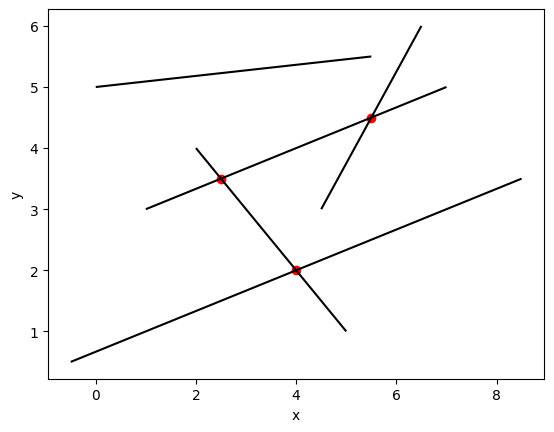

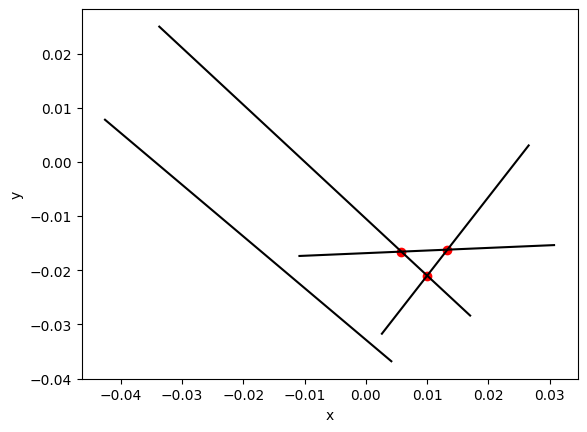

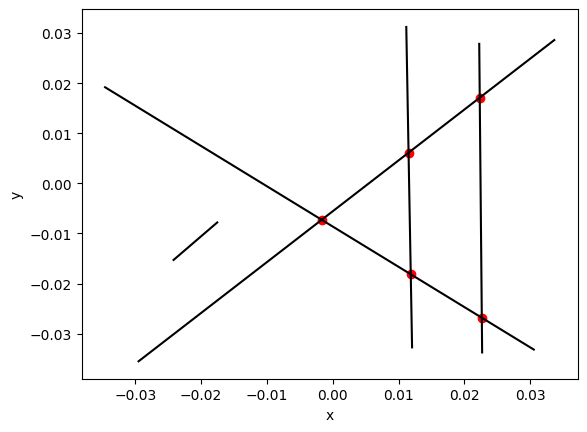

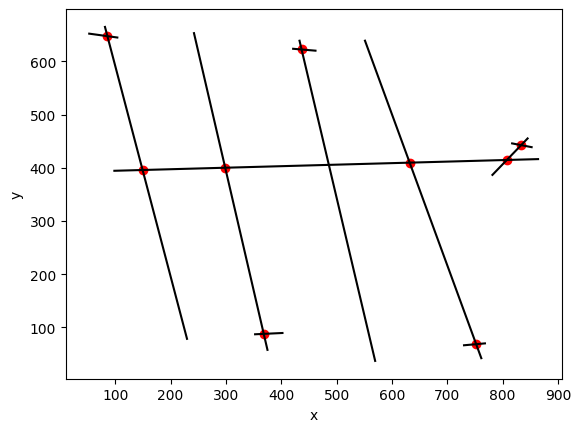

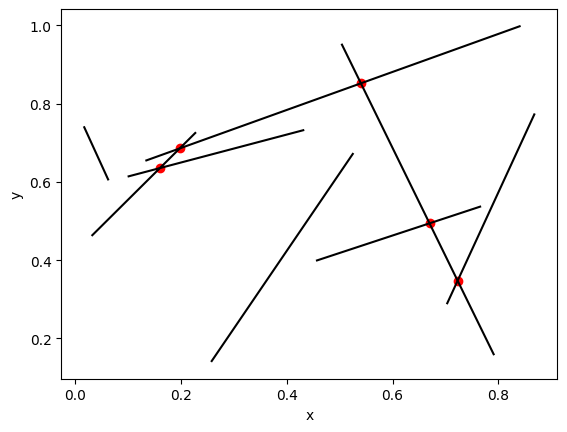

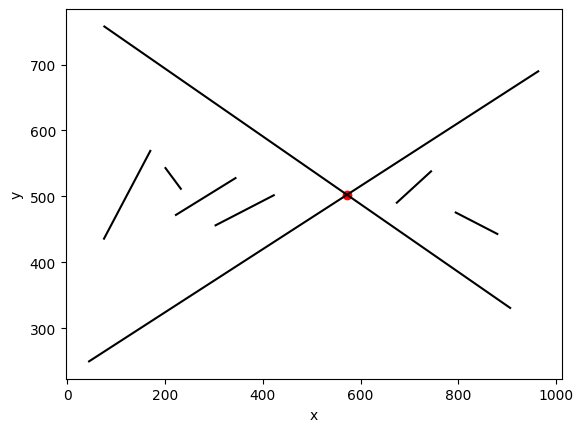

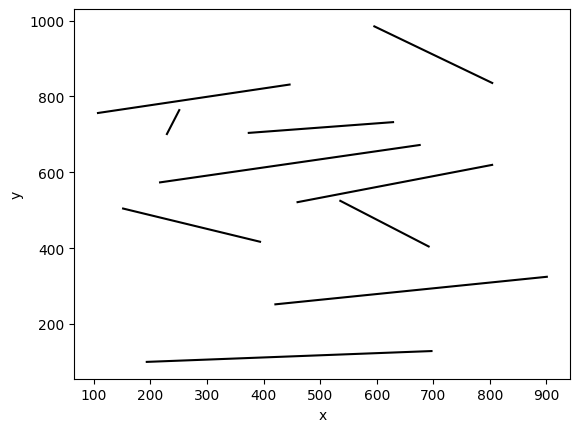

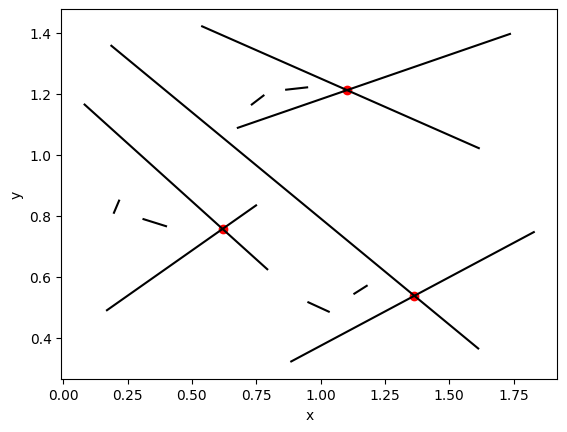

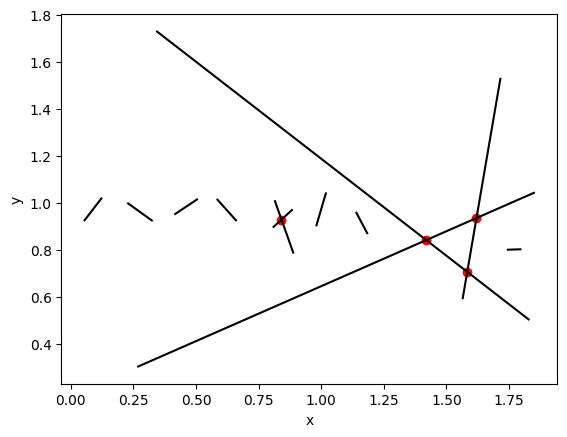

In [21]:
for seg in segments:
    vis=Visualizer()
    vis.add_line_segment(seg, color="black")
    res=find_intersections(seg)
    print(len(res), res)
    for point in res:
        vis.add_point(point[0], color="red")
    vis.show()

Uzupełnij funkcję ```find_intersections_with_visualization```

In [22]:
import heapq
from sortedcontainers import SortedSet

class Event:
    def __init__(self, x, event_type, index1, index2=None):
        self.x = x
        self.event_type = event_type
        self.index1 = index1
        self.index2 = index2

    def __lt__(self, other):
        if self.x != other.x:
            return self.x < other.x
        priority = {'start': 0, 'intersection': 1, 'end': 2}
        return priority[self.event_type] < priority[other.event_type]

    def __repr__(self):
        return f"Event({self.x}, {self.event_type}, {self.index1}, {self.index2})"
    

def get_intersection_point(s1, s2, eps=1e-18):
    """
    Oblicza punkt przecięcia dwóch odcinków, jeśli istnieje.
    """
    (x1, y1), (x2, y2) = s1
    (x3, y3), (x4, y4) = s2

    denominator = (x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)
    if abs(denominator) < eps:
        return None  # Odcinki równoległe

    px = ((x1 * y2 - y1 * x2) * (x3 - x4) - (x1 - x2) * (x3 * y4 - y3 * x4)) / denominator
    py = ((x1 * y2 - y1 * x2) * (y3 - y4) - (y1 - y2) * (x3 * y4 - y3 * x4)) / denominator

    if (min(x1, x2) - eps <= px <= max(x1, x2) + eps and
        min(y1, y2) - eps <= py <= max(y1, y2) + eps and
        min(x3, x4) - eps <= px <= max(x3, x4) + eps and
        min(y3, y4) - eps <= py <= max(y3, y4) + eps):
        return (px, py)
    return None

def check_neighbors(curr_idx, active_segments, segments, checked_pairs, events, eps, intersections, vis=None):
    """
    Sprawdza przecięcia bieżącego odcinka z sąsiadami w zbiorze aktywnym.
    """
    curr_seg_idx = active_segments[curr_idx]
    # Sprawdzenie poprzedniego sąsiada
    if curr_idx > 0:
        prev_seg_idx = active_segments[curr_idx - 1]
        pair = (min(prev_seg_idx, curr_seg_idx), max(prev_seg_idx, curr_seg_idx))
        if pair not in checked_pairs:
            if vis:
                vis.add_line_segment([segments[curr_seg_idx], segments[prev_seg_idx]], color="yellow")  # Aktualnie sprawdzane
            intersection = get_intersection_point(segments[prev_seg_idx], segments[curr_seg_idx], eps)
            if intersection:
                vis.add_point(intersection, color="red")
                checked_pairs.add(pair)
                intersections.append((intersection, curr_seg_idx + 1, prev_seg_idx + 1))
                heapq.heappush(events, Event(intersection[0], 'intersection', prev_seg_idx, curr_seg_idx))
                if vis:
                    vis.add_line_segment([segments[curr_seg_idx], segments[prev_seg_idx]], color="red")  # Z przecięciem
                    vis.add_line_segment([segments[curr_seg_idx], segments[prev_seg_idx]], color="green")
            elif vis:
                vis.add_line_segment([segments[curr_seg_idx], segments[prev_seg_idx]], color="green")  # Brak przecięcia

    # Sprawdzenie następnego sąsiada
    if curr_idx < len(active_segments) - 1:
        next_seg_idx = active_segments[curr_idx + 1]
        pair = (min(curr_seg_idx, next_seg_idx), max(curr_seg_idx, next_seg_idx))
        if pair not in checked_pairs:
            if vis:
                vis.add_line_segment([segments[curr_seg_idx], segments[next_seg_idx]], color="yellow")  # Aktualnie sprawdzane
            intersection = get_intersection_point(segments[curr_seg_idx], segments[next_seg_idx], eps)
            if intersection:
                vis.add_point(intersection, color="red")
                checked_pairs.add(pair)
                intersections.append((intersection, curr_seg_idx + 1, next_seg_idx + 1))
                heapq.heappush(events, Event(intersection[0], 'intersection', curr_seg_idx, next_seg_idx))
                if vis:
                    vis.add_line_segment([segments[curr_seg_idx], segments[next_seg_idx]], color="red")  # Z przecięciem
                    vis.add_line_segment([segments[curr_seg_idx], segments[next_seg_idx]], color="green")
            elif vis:
                vis.add_line_segment([segments[curr_seg_idx], segments[next_seg_idx]], color="green")  # Brak przecięcia


def check_after_removing_two_new_neighbours(curr_idx, active_segments, segments, checked_pairs, events, eps, intersections, vis=None):
    """
    Sprawdza przecięcia dwóch nowych sąsiadów po usunięciu przecinającego się odcinka.
    """  
    if curr_idx > 0 and curr_idx + 1 < len(active_segments):
        prev_idx = active_segments[curr_idx - 1]
        next_idx = active_segments[curr_idx + 1]
        pair = (min(prev_idx, next_idx), max(prev_idx, next_idx))
        if pair not in checked_pairs:
            if vis:
                vis.add_line_segment([segments[prev_idx], segments[next_idx]], color="yellow")  # Aktualnie sprawdzane
            intersection = get_intersection_point(segments[prev_idx], segments[next_idx], eps)
            if intersection:
                vis.add_point(intersection, color="red")
                checked_pairs.add(pair)
                intersections.append((intersection, prev_idx + 1, next_idx + 1))
                heapq.heappush(events, Event(intersection[0], 'intersection', prev_idx, next_idx))
                if vis:
                    vis.add_line_segment([segments[prev_idx], segments[next_idx]], color="red")  # Z przecięciem
                    vis.add_line_segment([segments[prev_idx], segments[next_idx]], color="green") 
            elif vis:
                vis.add_line_segment([segments[prev_idx], segments[next_idx]], color="green")  # Brak przecięcia


def check_after_intersection(ind1, ind2, active_segments, segments, checked_pairs, events, eps, intersections, vis=None):
    """
    Sprawdza przecięcia dla sąsiadów przecinającego się odcinka.
    """
    for ind in [ind1, ind2]:
        if ind > 0:
            prev_ind = active_segments[ind - 1]
            pair = (min(prev_ind, ind), max(prev_ind, ind))
            if pair not in checked_pairs:
                if vis:
                    vis.add_line_segment([segments[prev_ind], segments[ind]], color="yellow")  # Aktualnie sprawdzane
                intersection = get_intersection_point(segments[prev_ind], segments[ind], eps)
                if intersection:
                    vis.add_point(intersection, color="red")
                    checked_pairs.add(pair)
                    intersections.append((intersection, prev_ind + 1, ind + 1))
                    heapq.heappush(events, Event(intersection[0], 'intersection', prev_ind, ind))
                    if vis:
                        vis.add_line_segment([segments[prev_ind], segments[ind]], color="red")  # Z przecięciem
                        vis.add_line_segment([segments[prev_ind], segments[ind]], color="green")
                elif vis:
                    vis.add_line_segment([segments[prev_ind], segments[ind]], color="green")  # Brak przecięcia

        if ind < len(active_segments) - 1:
            next_ind = active_segments[ind + 1]
            pair = (min(ind, next_ind), max(ind, next_ind))
            if pair not in checked_pairs:
                if vis:
                    vis.add_line_segment([segments[ind], segments[next_ind]], color="yellow")  # Aktualnie sprawdzane
                intersection = get_intersection_point(segments[ind], segments[next_ind], eps)
                if intersection:
                    checked_pairs.add(pair)
                    intersections.append((intersection, ind + 1, next_ind + 1))
                    vis.add_point(intersection, color="red")
                    heapq.heappush(events, Event(intersection[0], 'intersection', ind, next_ind))
                    if vis:
                        vis.add_line_segment([segments[ind], segments[next_ind]], color="red")  # Z przecięciem
                        vis.add_line_segment([segments[ind], segments[next_ind]], color="green")  
                elif vis:
                    vis.add_line_segment([segments[ind], segments[next_ind]], color="green")  # Brak przecięcia

    

def find_intersections_with_visualization(segments, eps = 1e-18):
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków i dodatkowo zwraca kolejne kroki w wizualizacji 
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """
    def compute_y(segment, x):
        """Oblicza współrzędną y dla odcinka w danym x."""
        (x1, y1), (x2, y2) = segment
        if x1 == x2:
            return y1
        return y1 + (y2 - y1)/(x2 - x1) * (x - x1) # y = y1 + a * (x - x1)
    
    vis = Visualizer()
    vis.add_line_segment(segments, color="black")  # Rysuj wszystkie segmenty na czarno

    events = []
    checked_pairs = set()  # Zbiór do przechowywania sprawdzonych par segmentów

    # Dodajemy punkty początkowe i końcowe do wizualizacji
    start_points = []
    end_points = []
    for p1, p2 in segments:
        if p1[0] > p2[0]:  # Zamiana punktów, aby p1 zawsze był "lewy"
            p1, p2 = p2, p1
        start_points.append(p1)
        end_points.append(p2)

    vis.add_point(start_points, color="#6ac5fe")  # Punkty początkowe na niebiesko
    vis.add_point(end_points, color="#8fd3fe")   # Punkty końcowe na jasnoniebiesko

    # Tworzymy zdarzenia startu i końca dla każdego segmentu
    for idx, (p1, p2) in enumerate(segments):
        if p1[0] > p2[0]:  # Zamiana punktów, aby p1 zawsze był "lewy"
            p1, p2 = p2, p1
        events.append(Event(p1[0], 'start', idx))
        events.append(Event(p2[0], 'end', idx))
            
    intersections = []

    heapq.heapify(events)
    current_x = float('-inf')
    active_segments = SortedSet(key=lambda idx: -(compute_y(segments[idx], current_x)))

    while events:
        event = heapq.heappop(events)
        vis.add_line([(event.x, 0), (event.x, 0.000001)], color="orange")  # Miotła (pomarańczowa pionowa linia)
        current_x = event.x
        active_segments = SortedSet(active_segments, key=lambda idx: -(compute_y(segments[idx], current_x)))
        if event.event_type == 'start':
            segment_idx = event.index1
            vis.add_line_segment([segments[segment_idx]], color="green")  # Aktywny segment na zielono
            current_x = event.x+eps
            active_segments.add(segment_idx)
            curr_idx = active_segments.index(segment_idx)
            check_neighbors(curr_idx, active_segments, segments, checked_pairs, events, eps,intersections,vis)
            

        elif event.event_type == 'end':
            segment_idx = event.index1
            curr_idx = active_segments.index(segment_idx)
            check_after_removing_two_new_neighbours(curr_idx, active_segments, segments, checked_pairs, events, eps, intersections,vis)
            active_segments.discard(segment_idx)


        elif event.event_type == 'intersection':
            active_segments.discard(event.index1)
            active_segments.discard(event.index2)
            current_x +=eps
            active_segments.add(event.index1)
            active_segments.add(event.index2)
            ind1, ind2 = active_segments.index(event.index1), active_segments.index(event.index2)
            active_segments = SortedSet(active_segments, key=lambda idx: -(compute_y(segments[idx], current_x)))
            check_after_intersection(ind1, ind2, active_segments, segments, checked_pairs, events, eps, intersections,vis)
        
        vis.add_line([(event.x, 0), (event.x, 0.000001)], color="#E5E4E2") # Miotła (szara linia)
        
    #dla wyróżnienia na koniec
    for intersections in intersections:
        vis.add_point([intersections[0]], color="red")
    
    return intersections,vis

In [23]:
for seg in segments:
    res, vis = find_intersections_with_visualization(seg)
    print(len(res), res)
    vis.axis_equal()
    # filename="segments"+str(segments.index(seg))
    # vis.save_gif(filename,interval=200)

3 ((5.5, 4.5), 4, 2)
3 ((0.010025601838031016, -0.020988202988542273), 2, 4)
3 ((0.02265867063122986, -0.02681736354721218), 1, 4)
3 ((np.float64(833.3740102831949), np.float64(442.6086107915207)), 7, 6)
3 ((np.float64(0.6698957836663718), np.float64(0.49403538940990865)), 3, 8)
3 ((572.1712597554096, 502.5053291602577), 1, 2)
0 []
3 ((1.3644455912666476, 0.5375746192489645), 6, 5)
3 ((1.620041647183481, 0.9350127358960857), 2, 11)


### Czy konieczne były zmiany w strukturze zdarzeń. Jeśli tak, to jakie? Czy w przypadku obu algorytmów konieczne są takie same struktury zdarzeń?
### Odpowiedź uzasadnij. 

Lista została zamieniona na kopiec(heapq), ponieważ teraz musimy dodawać zdarzenia typu "intersection", a kopiec zapewnia to w czasie logarytmicznym O(log n).

### Samemu zaprojektuj test, który uwzględnia taki układ odcinków, przy którym pewne przecięcia będą wykrywane więcej niż jeden raz

3


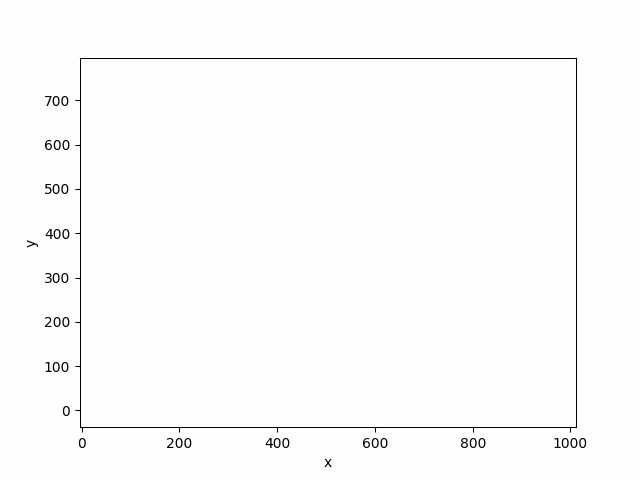

In [24]:
testing_sections = [((74.01707416226265, 758.6096753586153), (907.6891805563621, 330.0133573378244)), ((42.65636796561944, 248.99819966316272), (965.1838085835413, 690.6614785992216)), ((74.01707416226265, 434.54904465996856), (170.71258493524596, 570.4454381787559)), ((220.3670364132645, 471.136535222719), (345.8098611998374, 528.6311632498982)), ((301.3821940879261, 455.4561821243974), (424.21162669144553, 502.49724141936224)), ((199.45989894883564, 544.3115163482198), (233.43399732853243, 510.337417968523)), ((672.4838840815378, 489.4302805040942), (745.6588652070386, 539.0847319821127)), ((792.6999245020036, 476.36331958882613), (881.555258725826, 442.38922120912935))]

vis=Visualizer()
vis.add_line_segment(testing_sections)
vis.show()
res,vis=find_intersections_with_visualization(testing_sections)
print(len(res))
vis.show_gif(interval=100)


### Czy Twój program uwzględnia powyższy przypadek? Jeśli tak, to jak? 

Tak, uzywam zbioru checked_pairs

### Zadanie dodatkowe


In [25]:
def binary_find_place(T, ins):
    """Znajduje miejsce wstawienia elementu w posortowanej liście."""
    n = len(T)
    p, r = 0, n

    while p < r:
        q = (p + r) // 2

        if T[q][1] < ins[1]:
            p = q + 1
        else:
            r = q

    return p


def compute_y(segment, x):
    """Oblicza współrzędną y dla odcinka w punkcie x."""
    (x1, y1), (x2, y2) = segment
    if x1 == x2:  # Odcinek pionowy
        return y1
    return y1 + (y2 - y1) / (x2 - x1) * (x - x1)


def get_intersection_point(s1, s2, eps=1e-18):
    """Oblicza punkt przecięcia dwóch odcinków, jeśli istnieje."""
    (x1, y1), (x2, y2) = s1
    (x3, y3), (x4, y4) = s2

    denominator = (x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)
    if abs(denominator) < eps:
        return None  # Równoległe

    px = ((x1 * y2 - y1 * x2) * (x3 - x4) - (x1 - x2) * (x3 * y4 - y3 * x4)) / denominator
    py = ((x1 * y2 - y1 * x2) * (y3 - y4) - (y1 - y2) * (x3 * y4 - y3 * x4)) / denominator

    if (min(x1, x2) - eps <= px <= max(x1, x2) + eps and
        min(y1, y2) - eps <= py <= max(y1, y2) + eps and
        min(x3, x4) - eps <= px <= max(x3, x4) + eps and
        min(y3, y4) - eps <= py <= max(y3, y4) + eps):
        return px, py
    return None


def process_neighbor(idx1, idx2, T, sections, checked_pairs, points, Q):
    """Sprawdza przecięcia między dwoma odcinkami."""
    s1_idx, _ = T[idx1]
    s2_idx, _ = T[idx2]

    if (s1_idx, s2_idx) in checked_pairs:
        return

    checked_pairs.add((s1_idx, s2_idx))
    intersection = get_intersection_point(sections[s1_idx], sections[s2_idx])
    if intersection:
        points.append((intersection, s1_idx, s2_idx))
        Q.append((intersection, 'intersection', s1_idx, s2_idx))
        Q.sort(key=lambda e: (e[0][0], e[0][1]))


def find_intersections_list(sections):
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków.
    :param sections: Lista odcinków w postaci krotek współrzędnych punktów końcowych odcinków.
    :return: Lista punktów przecięć w formacie [((x, y), id1, id2), ...].
    """
    Q = []  # Lista zdarzeń
    T = []  # Lista aktywnych odcinków
    checked_pairs = set()  # Zbiór przetworzonych par odcinków
    points = []  # Lista punktów przecięć

    # Przygotowanie zdarzeń
    for i, (p1, p2) in enumerate(sections):
        if p1[0] > p2[0]:
            p1, p2 = p2, p1  # Zapewnienie, że p1 ma mniejsze x
        Q.append((p1, 'start', i))
        Q.append((p2, 'end', i))

    # Sortowanie zdarzeń po współrzędnych x (i y w razie równości)
    Q.sort(key=lambda e: (e[0][0], e[0][1]))

    # Przetwarzanie zdarzeń
    for event in Q:
        point, event_type, segment_idx = event[:3]

        if event_type == 'start':
            # Dodanie odcinka do listy aktywnych
            y_value = compute_y(sections[segment_idx], point[0])
            idx = binary_find_place(T, (segment_idx, y_value))
            T.insert(idx, (segment_idx, y_value))

            # Sprawdzanie przecięć z sąsiadami
            if idx > 0:
                process_neighbor(idx - 1, idx, T, sections, checked_pairs, points, Q)
            if idx + 1 < len(T):
                process_neighbor(idx, idx + 1, T, sections, checked_pairs, points, Q)

        elif event_type == 'end':
            # Usunięcie odcinka z listy aktywnych
                # Sprawdzenie, czy segment istnieje w T przed próbą jego usunięcia
            idx = next((i for i, (seg, _) in enumerate(T) if seg == segment_idx), None)
            if idx is not None:  # Jeśli segment został znaleziony
                if idx > 0 and idx + 1 < len(T):
                    process_neighbor(idx - 1, idx + 1, T, sections, checked_pairs, points, Q)
                T.pop(idx)

        elif event_type == 'intersection':
            idx1 = next(i for i, (seg, _) in enumerate(T) if seg == event[2])
            idx2 = next(i for i, (seg, _) in enumerate(T) if seg == event[3])
            T[idx1], T[idx2] = T[idx2], T[idx1]
            if idx1 > idx2:
                idx1, idx2 = idx2, idx1
            if idx1 > 0:
                process_neighbor(idx1 - 1, idx1, T, sections, checked_pairs, points, Q)
            if idx2 + 1 < len(T):
                process_neighbor(idx2, idx2 + 1, T, sections, checked_pairs, points, Q)

    return points

[((-0.5, 0.5), (8.5, 3.5)), ((1, 3), (7, 5)), ((2, 4), (5, 1)), ((4.5, 3), (6.5, 6)), ((0, 5), (5.5, 5.5))]
[((2.5, 3.5), 1, 2), ((4.0, 2.0), 0, 2), ((5.5, 4.5), 3, 1)]
[((-0.04271371103102162, 0.007908498446146661), (0.004302418001236444, -0.03691380547542198)), ((-0.03384274328908614, 0.02509599844614667), (0.017165321227042896, -0.02848856037738276)), ((-0.011000001353602261, -0.017367236847970993), (0.030915321227042908, -0.015345178024441575)), ((0.002528224452849351, -0.03185865841659845), (0.02670161154962354, 0.0031903611912447033))]
[((0.013332591183346312, -0.016193395626923048), 3, 2), ((0.005806934807635713, -0.01655644472067815), 2, 1), ((0.010025601838031016, -0.020988202988542273), 3, 1), ((0.005806934807635713, -0.01655644472067815), 1, 2), ((0.010025601838031016, -0.020988202988542273), 1, 3)]
[((-0.034729840063279685, 0.019299425704806472), (0.030693547033494514, -0.03327410370695825)), ((-0.02962903361166678, -0.03563317233440923), (0.03379838574317193, 0.02873570021

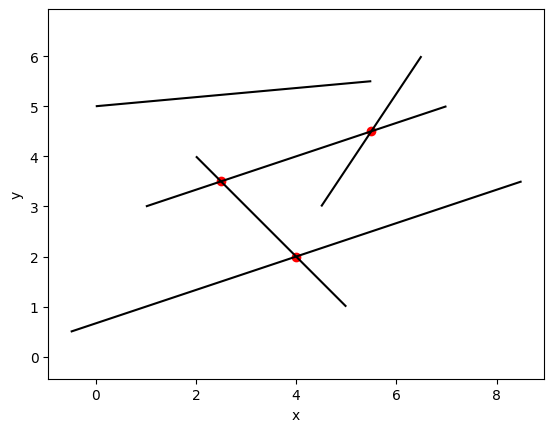

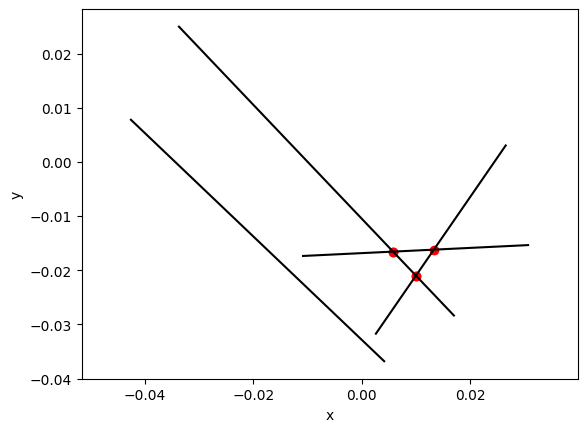

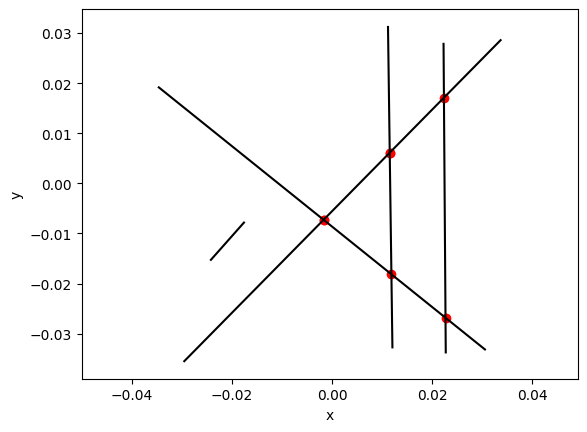

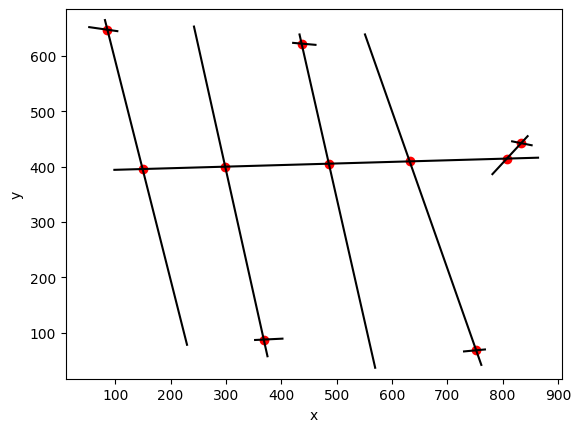

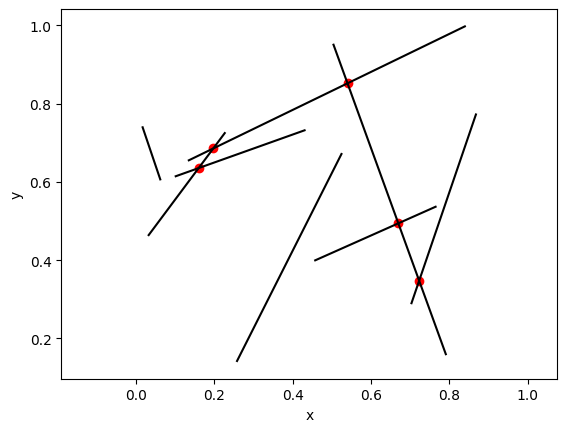

In [26]:
for seg in segments[0:5]:
    print(seg)
    visualize = Visualizer()
    visualize.add_line_segment([seg], color="black")
    res = find_intersections_list(seg)
    for inter in res:
        visualize.add_point([inter[0]], color="red")
    print(res)
    visualize.axis_equal()
    visualize.show()